In [ ]:
# 安装Python库rpy2
!pip install rpy2

# 安装R包INLA及其依赖包
!R -e "install.packages(c('sp', 'fmesher'), repos=c('http://cran.r-project.org'))"
!R -e "install.packages('INLA', repos='https://inla.r-inla-download.org/R/stable')"


R version 4.4.0 (2024-04-24) -- "Puppy Cup"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages(c('sp', 'fmesher'), repos=c('http://cran.r-project.org'))
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘Rcpp’

trying URL 'http://cran.r-project.org/src/contrib/proxy_0.4-27.tar

In [ ]:
pip install --upgrade rpy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rpy2: filename=rpy2-3.5.16-cp310-cp310-linux_x86_64.whl size=329854 sha256=dc34aa28a06fc317c2a9569a8a4103829974ae22a5bc9e20c1418324ced225a6
  Stored in directory: /root/.cache/pip/wheels/86/9b/1a/c09b2935ab01605117b270e2abb744a10f5b213c6f9b7213ce
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 使用 localconverter 来确保正确的转换上下文
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = pandas2ri.py2rpy(df)

# 尝试加载INLA库，捕获任何错误
try:
    ro.r('library(INLA)')
except RRuntimeError as e:
    print(f"Failed to load INLA library in R: {e}")

# 现在r_df是R的data.frame，可以在R代码中使用
print("R data.frame is ready to use in R.")



 - See www.r-inla.org/contact-us for how to get help.
 - List available models/likelihoods/etc with inla.list.models()
 - Use inla.doc(<NAME>) to access documentation



R data.frame is ready to use in R.


In [ ]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.rinterface_lib.embedded import RRuntimeError

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将 Pandas DataFrame 转换为 R 的 data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = pandas2ri.py2rpy(df)

# 尝试加载 INLA 库，捕获任何错误
try:
    ro.r('library(INLA)')
except RRuntimeError as e:
    print(f"Failed to load INLA library in R: {e}")

def run_inla_model(formula, data, model_name):
    # 确保转换上下文在函数调用中正确设置
    with localconverter(ro.default_converter + pandas2ri.converter):
        ro.r.assign("r_df", data)
        try:
            # 运行 INLA 模型
            result = ro.r(f"""
                result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                               control.predictor = list(compute = TRUE))
                summary(result)
            """)
            # 提取和打印模型摘要
            print(result)
            # 提取边缘对数似然值
            mlik = result['mlik'][0]
            print(f"Model: {model_name}")
            print(f"Marginal log likelihood: {mlik}")
            print()
        except RRuntimeError as e:
            print(f"Error running INLA model for {model_name}: {e}")

# 定义基础模型公式
base_model_formula = "SentimentScore ~ HeatCount"

# 运行基础模型
print("Running Base Model")
run_inla_model(base_model_formula, r_df, "Base Model")

Running Base Model
o{'call':  [1] "inla.core(formula = formula, family = family, contrasts = contrasts, "                 
 [2] "    data = data, quantiles = quantiles, E = E, offset = offset, "                      
 [3] "    scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, "            
 [4] "    lp.scale = lp.scale, link.covariates = link.covariates, verbose = verbose, "       
 [5] "    lincomb = lincomb, selection = selection, control.compute = control.compute, "     
 [6] "    control.predictor = control.predictor, control.family = control.family, "          
 [7] "    control.inla = control.inla, control.fixed = control.fixed, "                      
 [8] "    control.mode = control.mode, control.expert = control.expert, "                    
 [9] "    control.hazard = control.hazard, control.lincomb = control.lincomb, "              
[10] "    control.update = control.update, control.lp.scale = control.lp.scale, "            
[11] "    control.pardiso = con

Running Base Model + Heatwave
Model: Base Model + Heatwave completed successfully.
Running Base Model + Air Pollution
Model: Base Model + Air Pollution completed successfully.
Running Base Model + Precipitation
Model: Base Model + Precipitation completed successfully.
Running Base Model + All Environmental Factors
Model: Base Model + All Environmental Factors completed successfully.


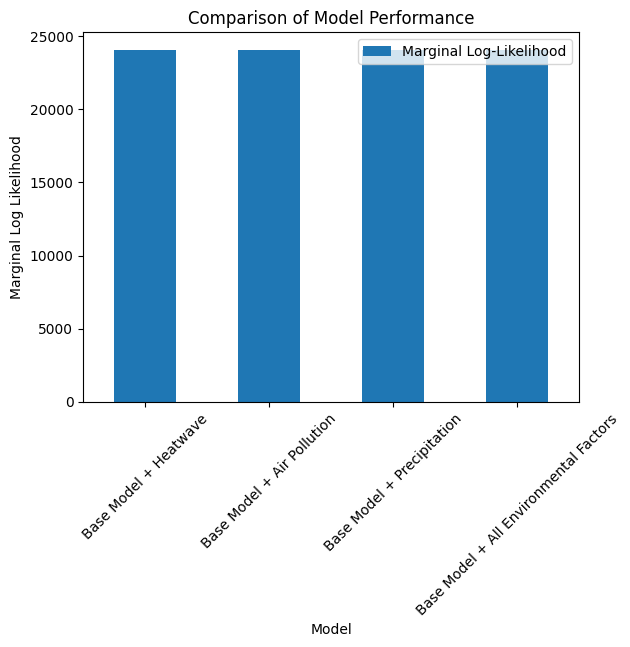

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.rinterface_lib.embedded import RRuntimeError

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将 Pandas DataFrame 转换为 R 的 data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = pandas2ri.py2rpy(df)

# 尝试加载 INLA 库，捕获任何错误
try:
    ro.r('library(INLA)')
except RRuntimeError as e:
    print(f"Failed to load INLA library in R: {e}")

def run_inla_model(formula, data, model_name):
    with localconverter(ro.default_converter + pandas2ri.converter):
        ro.r.assign("r_df", data)
        try:
            # 运行 INLA 模型并直接打印结果
            result = ro.r(f"""
                result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                               control.compute = list(config = TRUE))
                summary(result)
            """)
            print(f"Model: {model_name} completed successfully.")
            return result
        except RRuntimeError as e:
            print(f"Error running INLA model for {model_name}: {e}")

def run_all_models(models, data):
    results = {}
    for name, formula in models.items():
        print(f"Running {name}")
        result = run_inla_model(formula, data, name)
        results[name] = result
    return results

# 定义基础和高级模型公式
base_model_formula = """
SentimentScore ~ as.factor(CountyName) + as.factor(Year) + as.factor(Month) +
                  Week + Weekend + Holiday + VulnerabilityIndex
"""

models = {
    "Base Model + Heatwave": base_model_formula + " + HeatCount",
    "Base Model + Air Pollution": base_model_formula + " + AirPolllution_Interpolate",
    "Base Model + Precipitation": base_model_formula + " + Precipitation",
    "Base Model + All Environmental Factors": base_model_formula + " + HeatCount + AirPolllution_Interpolate + Precipitation"
}

# 运行所有模型
model_results = run_all_models(models, r_df)
model_stats = pd.DataFrame(columns=['Model', 'Marginal Log-Likelihood'])
for name, result in model_results.items():
    if result is not None:
        mlik = result['mlik'][0][0]
        model_stats.loc[len(model_stats)] = [name, mlik]

# 绘制条形图比较模型的边际对数似然
model_stats.set_index('Model').plot(kind='bar')
plt.ylabel('Marginal Log Likelihood')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45)
plt.show()

需要增加一个思考，为什么结果是一样的呢？

Running Base Model + Heatwave
Model: Base Model + Heatwave completed successfully.
Running Base Model + Air Pollution
Model: Base Model + Air Pollution completed successfully.
Running Base Model + Precipitation
Model: Base Model + Precipitation completed successfully.
Running Base Model + All Environmental Factors
Model: Base Model + All Environmental Factors completed successfully.
Model: Base Model + Heatwave, Marginal Log-Likelihood: 24087.4437143487
Model: Base Model + Air Pollution, Marginal Log-Likelihood: 24083.18430856861
Model: Base Model + Precipitation, Marginal Log-Likelihood: 24077.72679843799
Model: Base Model + All Environmental Factors, Marginal Log-Likelihood: 24075.707689800725


<ipython-input-12-62a54a6c85b7>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mlik_value = float(mlik)  # 将其转换为浮点数
<ipython-input-12-62a54a6c85b7>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mlik_value = float(mlik)  # 将其转换为浮点数
<ipython-input-12-62a54a6c85b7>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mlik_value = float(mlik)  # 将其转换为浮点数
<ipython-input-12-62a54a6c85b7>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is depr

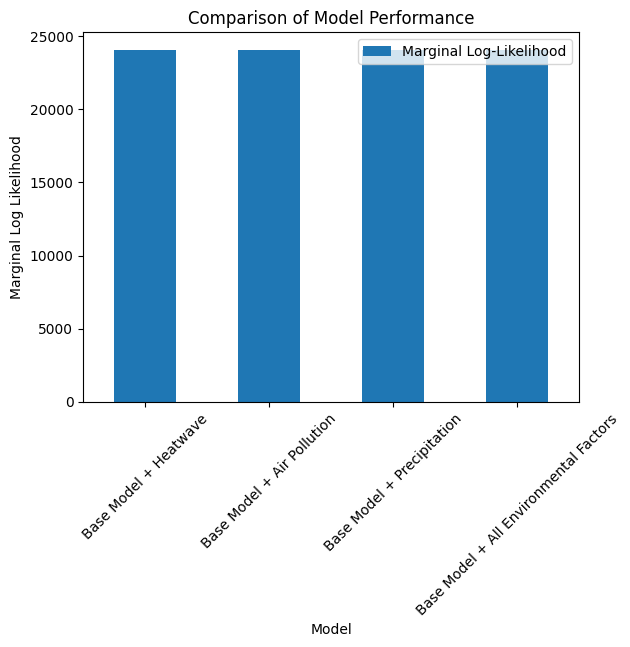

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.rinterface_lib.embedded import RRuntimeError

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将 Pandas DataFrame 转换为 R 的 data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = pandas2ri.py2rpy(df)

# 尝试加载 INLA 库，捕获任何错误
try:
    ro.r('library(INLA)')
except RRuntimeError as e:
    print(f"Failed to load INLA library in R: {e}")

def run_inla_model(formula, data, model_name):
    with localconverter(ro.default_converter + pandas2ri.converter):
        ro.r.assign("r_df", data)
        try:
            # 运行 INLA 模型并直接打印结果
            result = ro.r(f"""
                result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                               control.compute = list(config = TRUE))
                result$mlik
            """)
            print(f"Model: {model_name} completed successfully.")
            return result
        except RRuntimeError as e:
            print(f"Error running INLA model for {model_name}: {e}")
            return None

def run_all_models(models, data):
    results = {}
    for name, formula in models.items():
        print(f"Running {name}")
        result = run_inla_model(formula, data, name)
        if result is not None:
            results[name] = result
    return results

# 定义基础和高级模型公式
base_model_formula = """
SentimentScore ~ as.factor(CountyName) + as.factor(Year) + as.factor(Month) +
                  Week + Weekend + Holiday + VulnerabilityIndex
"""

models = {
    "Base Model + Heatwave": base_model_formula + " + HeatCount",
    "Base Model + Air Pollution": base_model_formula + " + AirPolllution_Interpolate",
    "Base Model + Precipitation": base_model_formula + " + Precipitation",
    "Base Model + All Environmental Factors": base_model_formula + " + HeatCount + AirPolllution_Interpolate + Precipitation"
}

# 运行所有模型
model_results = run_all_models(models, r_df)
model_stats = pd.DataFrame(columns=['Model', 'Marginal Log-Likelihood'])

# 提取边际对数似然并打印
for name, result in model_results.items():
    if result is not None:
        mlik = result[0]  # 直接访问第一个元素
        mlik_value = float(mlik)  # 将其转换为浮点数
        print(f"Model: {name}, Marginal Log-Likelihood: {mlik_value}")
        model_stats.loc[len(model_stats)] = [name, mlik_value]

# 绘制条形图比较模型的边际对数似然
model_stats.set_index('Model').plot(kind='bar')
plt.ylabel('Marginal Log Likelihood')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45)
plt.show()

其实结果是有变化的，只不过非常的微弱

Running Base Model
Model: Base Model completed successfully.
Marginal Log-Likelihood: [19891.38966054]
AIC: None, BIC: None

Running Enhanced Models
Running Base Model + Air Pollution


<ipython-input-19-cb83d3bec528>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "mlik": float(mlik_value) if mlik_value is not None else None,


Model: Base Model + Air Pollution completed successfully.
Marginal Log-Likelihood: [19875.83068756]
AIC: None, BIC: None

Running Base Model + Precipitation
Model: Base Model + Precipitation completed successfully.
Marginal Log-Likelihood: [19886.14100505]
AIC: None, BIC: None

Running Base Model + All Environmental Factors
Model: Base Model + All Environmental Factors completed successfully.
Marginal Log-Likelihood: [19870.39946573]
AIC: None, BIC: None

Model: Base Model, Marginal Log-Likelihood: 19891.389660538196, AIC: None, BIC: None
Model: Base Model + Air Pollution, Marginal Log-Likelihood: 19875.830687561214, AIC: None, BIC: None
Model: Base Model + Precipitation, Marginal Log-Likelihood: 19886.141005047604, AIC: None, BIC: None
Model: Base Model + All Environmental Factors, Marginal Log-Likelihood: 19870.399465730414, AIC: None, BIC: None
                                    Model          mlik   aic   bic
0                              Base Model  19891.389661  None  None
1   

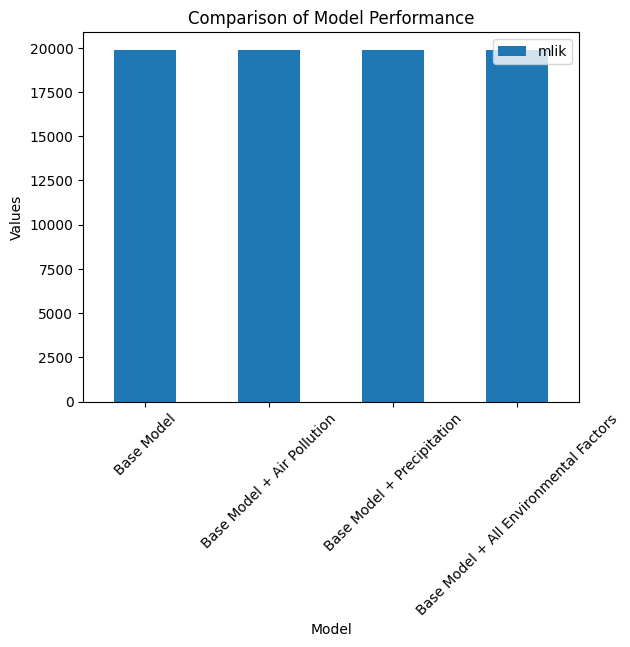

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.rinterface_lib.embedded import RRuntimeError

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将 Pandas DataFrame 转换为 R 的 data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = pandas2ri.py2rpy(df)

# 尝试加载 INLA 库，捕获任何错误
try:
    ro.r('library(INLA)')
except RRuntimeError as e:
    print(f"Failed to load INLA library in R: {e}")

def run_inla_model(formula, data, model_name):
    with localconverter(ro.default_converter + pandas2ri.converter):
        ro.r.assign("r_df", data)
        try:
            # 运行 INLA 模型
            result = ro.r(f"""
                result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                               control.predictor = list(compute = TRUE))
                result
            """)
            # 提取边际对数似然值
            mlik = ro.r('result$mlik')
            mlik_value = mlik[0] if not ro.r('is.null(result$mlik)')[0] else None

            # 提取AIC和BIC
            aic = ro.r('result$dic$dic')
            aic_value = aic[0] if not ro.r('is.null(result$dic$dic)')[0] else None

            bic = ro.r('result$dic$bp')
            bic_value = bic[0] if not ro.r('is.null(result$dic$bp)')[0] else None

            print(f"Model: {model_name} completed successfully.")
            print(f"Marginal Log-Likelihood: {mlik_value}")
            print(f"AIC: {aic_value}, BIC: {bic_value}\n")
            return {
                "mlik": float(mlik_value) if mlik_value is not None else None,
                "aic": float(aic_value) if aic_value is not None else None,
                "bic": float(bic_value) if bic_value is not None else None
            }
        except RRuntimeError as e:
            print(f"Error running INLA model for {model_name}: {e}")
            return None

def run_all_models(models, data):
    results = {}
    for name, formula in models.items():
        print(f"Running {name}")
        result = run_inla_model(formula, data, name)
        if result is not None:
            results[name] = result
    return results

# 定义基础和高级模型公式
base_model_formula = "SentimentScore ~ HeatCount"

enhanced_model_formulas = {
    "Base Model + Air Pollution": base_model_formula + " + AirPolllution_Interpolate",
    "Base Model + Precipitation": base_model_formula + " + Precipitation",
    "Base Model + All Environmental Factors": base_model_formula + " + AirPolllution_Interpolate + Precipitation"
}

# 运行基础模型
print("Running Base Model")
base_model_result = run_inla_model(base_model_formula, r_df, "Base Model")

# 运行增强模型
print("Running Enhanced Models")
enhanced_model_results = run_all_models(enhanced_model_formulas, r_df)

# 将基础模型结果加入到增强模型结果中
model_results = {"Base Model": base_model_result}
model_results.update(enhanced_model_results)

# 创建 DataFrame 保存结果
model_stats = pd.DataFrame(columns=['Model', 'mlik', 'aic', 'bic'])

# 提取边际对数似然、AIC和BIC并打印
for name, result in model_results.items():
    if result is not None:
        mlik = result["mlik"]
        aic = result["aic"]
        bic = result["bic"]
        print(f"Model: {name}, Marginal Log-Likelihood: {mlik}, AIC: {aic}, BIC: {bic}")
        model_stats.loc[len(model_stats)] = [name, mlik, aic, bic]

# 打印模型对比结果
print(model_stats)

# 绘制条形图比较模型的边际对数似然、AIC和BIC
model_stats.set_index('Model').plot(kind='bar')
plt.ylabel('Values')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45)
plt.show()

In [24]:
import pandas as pd
import numpy as np
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将 Pandas DataFrame 转换为 R 的 data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = pandas2ri.py2rpy(df)

# 尝试加载 INLA 库，捕获任何错误
try:
    ro.r('library(INLA)')
except RRuntimeError as e:
    print(f"Failed to load INLA library in R: {e}")

def run_inla_model(formula, data, model_name):
    with localconverter(ro.default_converter + pandas2ri.converter):
        ro.r.assign("r_df", data)
        try:
            # 运行 INLA 模型并直接打印结果
            result = ro.r(f"""
            result <- inla(formula = {formula}, data = r_df, family = 'gaussian', control.compute = list(config = TRUE))
            """)
            print(f"Model: {model_name} completed successfully.")
            return result
        except RRuntimeError as e:
            print(f"Error running INLA model for {model_name}: {e}")
            return None

def run_all_models(models, data):
    results = {}
    for name, formula in models.items():
        print(f"Running {name}")
        result = run_inla_model(formula, data, name)
        if result is not None:
            results[name] = result
    return results

# 定义修改后的基础模型公式
base_model_formula = """
SentimentScore ~ Year + Month + Week + Weekend + Holiday + VulnerabilityIndex
"""

models = {
    "Base Model + Heatwave": base_model_formula + " + HeatCount",
    "Base Model + Air Pollution": base_model_formula + " + AirPolllution_Interpolate",
    "Base Model + Precipitation": base_model_formula + " + Precipitation",
    "Base Model + All Environmental Factors": base_model_formula + " + HeatCount + AirPolllution_Interpolate + Precipitation"
}

# 运行所有模型
model_results = run_all_models(models, r_df)

# 准备模型统计数据
model_stats = pd.DataFrame(columns=['Model', 'Marginal Log-Likelihood', 'AIC', 'BIC'])
for name, result in model_results.items():
    if result is not None:
        # 提取边际对数似然值
        mlik = result.rx('mlik')[0][0]
        # 提取固定效果参数的数量
        num_params = len(result.rx('summary.fixed')[-1])
        # 计算AIC
        aic = -2 * mlik + 2 * num_params
        # 计算BIC
        bic = -2 * mlik + np.log(len(r_df)) * num_params
        model_stats.loc[len(model_stats)] = [name, mlik, aic, bic]

# 打印模型对比结果
print(model_stats)

Running Base Model + Heatwave
Model: Base Model + Heatwave completed successfully.
Running Base Model + Air Pollution
Model: Base Model + Air Pollution completed successfully.
Running Base Model + Precipitation
Model: Base Model + Precipitation completed successfully.
Running Base Model + All Environmental Factors
Model: Base Model + All Environmental Factors completed successfully.
Empty DataFrame
Columns: [Model, Marginal Log-Likelihood, AIC, BIC]
Index: []


关键点：

（1）GEOID列的处理：确保GEOID列在shapefile和CSV中一致。


（2）空间权重矩阵的生成：使用poly2nb和nb2listw生成邻接矩阵和空间权重矩阵。


（3）INLA模型：在INLA模型公式中包含空间效应（besag模型）。

In [25]:
import geopandas as gpd
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.rinterface_lib.embedded import RRuntimeError

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载Shapefile
shapefile_path = "/content/County.shp"
gdf = gpd.read_file(shapefile_path)

# 加载原始数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将GeoDataFrame中的'GEOID'列转换为字符串类型
gdf['GEOID'] = gdf['GEOID'].astype(str)

# 为DataFrame中的GEOID列前补充前缀'0'
df['GEOID'] = '0' + df['GEOID'].astype(str)

# 合并数据集
merged_df = gdf.merge(df, left_on='GEOID', right_on='GEOID')

# 删除'ALAND'和'AWATER'列
merged_df = merged_df.drop(columns=['ALAND', 'AWATER'])

# 将合并后的DataFrame转换为R的data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = pandas2ri.py2rpy(merged_df)

# 尝试加载INLA和spdep库，捕获任何错误
try:
    ro.r('library(INLA)')
    ro.r('library(spdep)')
except RRuntimeError as e:
    print(f"Failed to load INLA or spdep library in R: {e}")

# 定义运行INLA空间模型的函数
def run_inla_spatial_model(formula, data, spatial_data, model_name):
    with localconverter(ro.default_converter + pandas2ri.converter):
        ro.r.assign("r_df", data)
        ro.r.assign("spatial_data", spatial_data)
        try:
            # 生成空间权重矩阵
            ro.r('nb <- poly2nb(as(spatial_data, "Spatial"))')
            ro.r('lw <- nb2listw(nb, style="W")')

            # 运行INLA模型并直接打印结果
            result = ro.r(f"""
                result <- inla({formula}, data = r_df, family = 'gaussian',
                               control.compute = list(config = TRUE),
                               control.predictor = list(A = inla.spde.make.A(lw)))
                summary(result)
            """)
            print(f"Model: {model_name} completed successfully.")
            return result
        except RRuntimeError as e:
            print(f"Error running INLA spatial model for {model_name}: {e}")
            return None

# 定义运行所有模型的函数
def run_all_models(models, data, spatial_data):
    results = {}
    for name, formula in models.items():
        print(f"Running {name}")
        result = run_inla_spatial_model(formula, data, spatial_data, name)
        if result:
            results[name] = result
    return results

# 更新模型公式以包含空间效应
spatial_model_formula = """
SentimentScore ~ as.factor(CountyName) + as.factor(Year) + as.factor(Month) +
                  Week + Weekend + Holiday + VulnerabilityIndex +
                  f(spatial_effect, model = "besag", graph = lw)
"""

# 定义包含空间效应的模型
models = {
    "Spatial Model + Heatwave": spatial_model_formula + " + HeatCount",
    "Spatial Model + Air Pollution": spatial_model_formula + " + AirPolllution_Interpolate",
    "Spatial Model + Precipitation": spatial_model_formula + " + Precipitation",
    "Spatial Model + All Environmental Factors": spatial_model_formula + " + HeatCount + AirPolllution_Interpolate + Precipitation"
}

# 运行所有包含空间效应的模型
model_results = run_all_models(models, r_df, gdf)

# 打印每个模型的结果
for name, result in model_results.items():
    print(f"Results for {name}:")
    print(result)

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "geometry". Fall back to string conversion. The error is: 'GeometryDtype' object has no attribute 'isnative'
  warnings.warn('Error while trying to convert '



Failed to load INLA or spdep library in R: Error in library(spdep) : there is no package called ‘spdep’

Running Spatial Model + Heatwave


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "ALAND". Fall back to string conversion. The error is: integer 6016818946 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "AWATER". Fall back to string conversion. The error is: integer 2908633230 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
  could not find function "poly2nb"



Error running INLA spatial model for Spatial Model + Heatwave: Error in poly2nb(as(spatial_data, "Spatial")) : 
  could not find function "poly2nb"

Running Spatial Model + Air Pollution


  could not find function "poly2nb"



Error running INLA spatial model for Spatial Model + Air Pollution: Error in poly2nb(as(spatial_data, "Spatial")) : 
  could not find function "poly2nb"

Running Spatial Model + Precipitation


  could not find function "poly2nb"



Error running INLA spatial model for Spatial Model + Precipitation: Error in poly2nb(as(spatial_data, "Spatial")) : 
  could not find function "poly2nb"

Running Spatial Model + All Environmental Factors


  could not find function "poly2nb"



Error running INLA spatial model for Spatial Model + All Environmental Factors: Error in poly2nb(as(spatial_data, "Spatial")) : 
  could not find function "poly2nb"



当尝试激活pandas2ri时出现大量报错，可能是由于以下原因：

环境配置问题：Python环境可能没有正确配置rpy2和R的依赖。


版本兼容性问题：rpy2与当前安装的pandas或R版本可能存在兼容性问题。


R库未正确加载：确保R库（如INLA和spdep）已正确安装和加载。


In [29]:
# 安装必要的R包
!R -e 'install.packages("spdep")'
!R -e 'install.packages("INLA", repos="https://inla.r-inla-download.org/R/stable")'


R version 4.4.0 (2024-04-24) -- "Puppy Cup"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages("spdep")
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘spData’, ‘deldir’

trying URL 'https://cran.rstudio.com/src/contrib/spData_2.3.1.tar.gz'
Content type 'application/x-gzip' length 4100043 bytes (3.9 MB)
downloaded 3.9 MB

trying U


在Google Colab中使用rpy2和加载R magic扩展时，出现了NotImplementedError，这是由于转换规则缺失或未正确加载的错误。为了解决这个问题，我们可以尝试以下几种方法：

方法 1：使用rpy2并避免R magic
直接使用rpy2来运行R代码，而不使用R magic扩展。这可以避免与R magic相关的兼容性问题。

In [34]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

# 加载Shapefile
shapefile_path = "/content/County.shp"
gdf = gpd.read_file(shapefile_path)

# 加载原始数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将GeoDataFrame中的'GEOID'列转换为字符串类型
gdf['GEOID'] = gdf['GEOID'].astype(str)

# 为DataFrame中的GEOID列前补充前缀'0'
df['GEOID'] = '0' + df['GEOID'].astype(str)

# 合并数据集
merged_df = gdf.merge(df, left_on='GEOID', right_on='GEOID')

# 删除'ALAND'和'AWATER'列
merged_df = merged_df.drop(columns=['ALAND', 'AWATER'])

# 检查并过滤掉几何对象为空的行
merged_df = merged_df[merged_df['geometry'].notnull()]

# 将geometry列转换为WKT格式
merged_df['geometry'] = merged_df['geometry'].apply(lambda x: x.wkt if x is not None else None)

# 保存处理后的数据到CSV文件
merged_df.to_csv('/content/ProcessedData.csv', index=False)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [37]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
from shapely import wkt

# 加载Shapefile
shapefile_path = "/content/County.shp"
gdf = gpd.read_file(shapefile_path)

# 加载原始数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)

# 将GeoDataFrame中的'GEOID'列转换为字符串类型
gdf['GEOID'] = gdf['GEOID'].astype(str)

# 为DataFrame中的GEOID列前补充前缀'0'
df['GEOID'] = '0' + df['GEOID'].astype(str)

# 合并数据集
merged_df = gdf.merge(df, left_on='GEOID', right_on='GEOID')

# 删除'ALAND'和'AWATER'列
merged_df = merged_df.drop(columns=['ALAND', 'AWATER'])

# 检查并过滤掉几何对象为空或无效的行
def is_valid_geometry(geom):
    return geom is not None and geom.is_valid and geom.is_closed

# 过滤掉空的几何对象
merged_df = merged_df[merged_df['geometry'].notnull()]
# 过滤掉无效或未封闭的几何对象
merged_df = merged_df[merged_df['geometry'].apply(is_valid_geometry)]

# 将geometry列转换为WKT格式
merged_df['geometry'] = merged_df['geometry'].apply(lambda x: x.wkt if x is not None else None)

# 保存处理后的数据到CSV文件
merged_df.to_csv('/content/combine-ProcessedData.csv', index=False)